# Uvod u kvantno računanje

Za kolegij _matematički softver_ kao temu prvog eseja odabrala sam kvantno računanje.
U ovom uratku upoznat ćemo se s definicijom kvantnog računjanja, qubitima, sklopovima, te njihovom primjenom.
Zadaća se sastoji od sljedećih dijelova:
1. [Uvod](#uvod) 
2. [Osnovni pojmovi](#osnove)
    1. [Istraživanje qubita s Qiskit-om](#qiskit)
    2. [Pravila mjerenja](#mjerenje)
    3. [Geometrijski prikaz qubita - Blochova kugla](#bloch)
    


3. [Zaključak](#zakljucak) 
4. [Izvori](#izvori) 

## Uvod <a name="uvod"></a>

Kvantno računalo je bilo kakav uređaj za računanje koji izravno koristi različite kvantnomehaničke fenomene, kao što su superpozicija i povezanost (spregnutost), kako bi obavile operacije nad podacima. U klasičnom računalu, količina podataka je mjerena bitovima - u kvantnom su računalu podatci mjereni qubitovima (od engl. quantum bit). Osnovno načelo kvantnoga računanja jest to da se kvantna svojstva čestica mogu koristiti za predstavljanje i strukturiranje podataka, i da kvantni mehanizmi mogu biti iskorišteni za izvođenje operacija nad ovim podacima.

Iako je kvantno računarstvo još uvijek u relativno mladoj dobi, eksperimenti su izvedeni u kojima su kvantne računske operacije izvedene na vrlo malom broju qubita. Istraživanja i u teoretskim i u praktičnim područjima nastavljaju frenetičnim tempom, i vlade mnogih država te napose agencije za financiranje vojnih tehnologija potpomažu istraživanje kvantnoga računalstva kako bi se kvantna računala razvila za civilne svrhe, kao i za one koje se tiču pitanja od nacionalne sigurnosti, kao što je kriptoanaliza.

Vjeruje se da ako kvantna računala velikih razmjera mogu biti izgrađena, da će biti u mogućnosti riješiti određene probleme eksponencijalno brže od klasičnih računala. Kvantna su računala različita od ostalih računala kao što su DNK računala i tradicionalna računala zasnovana na tranzistorima, iako su ulimativno i svi tranzistori zasnovani na kvantnomehaničkim efektima (npr. osiromašena područja). Neke računarske arhitekture kao što su optička računala koje mogu koristiti klasičnu superpoziciju elektromagnetskih valova, ali bez specifičnih kvantnomehaničkih resursa kao što je povezanost, ne dijele potencijal za računskim ubrzavanjima kvantnih računala.

## Osnovni pojmovi <a name="osnove"></a>

U kvantnoj fizici, za opis stanja kvantnog sistema koriste se svojstveni vektori.
Pretpostavimo da želimo opisati poziciju auta na traci.
Koristeći klasični sistem, mogli bismo zaključiti da je auto na pozicji 4, odnosno _x=4_.

slika 1

Alternativno, možemo iskoristiti svojstveni vektor. Svaki element u sv.vektoru sadrži _vjerojatnost_ da se auto nalazi na određenom mjestu.

slika 2

Ovakva notacija nije limitirana na poziciju. Mogli bismo npr. promatrati sv.vektor svih brzina koje bi auto moglo postići, ili svih boja koje bi auto moglo imati.
S klasičnim sistemima s kojima smo upoznati, bilo bi nepotrebno koristiti ovakav  pristup jer zahtjeva promatranje velikih vektora kada zapravo trebamo samo jedan broj.
Ali kako ćemo dalje vidjeti, sv.vektori su jako dobar način za praćenje stanja kv.sustava, uključujući i kvantna računala.

Klasično računalo rabi skalarnu varijablu - klasični bit koji ima dvije moguće vrijednosti: 0 ili 1. Te vrijednosti klasičnog bita su jedinstvene i medusobno isključive: bit ima vrijednost 0 (i tako
nema vrijednost 1) odnosno ima vrijednost 1 (pa nema vrijednost 0). 

Kvantno računalo prihvaća od
klasičnog računala bit kao dvovrijednosnu varijablu (0, 1), ali ono bitu pridružuje par kompleksnih
brojeva ( $\alpha, \beta$ ) pomoću kojih formira superpoziciju vrijednosti klasičnog bita, tj. uzevši oznaku da
vrijednost bita nula (0) i jedan (1) uz uporabu posebnog zapisa zvanog “ket” | i napišemo ovako
$ 0 → |{0}\rangle $ i $1 → |{1}\rangle $, 
tada qubit $|{q}\rangle $napišemo kao linearnu kombinaciju stanja $|{0}\rangle$ i $|{1}\rangle $, tj.

$$ |{q}\rangle = \alpha|{0}\rangle +\beta |{1}\rangle $$. 

Kažemo da se stanja $|{0}\rangle$ i $|{1}\rangle$ nalaze u superpoziciji, jer stanje $|{q}\rangle$| kao da je istovremeno u jednom
i drugom stanju, a koeficijenti - kompleksni brojevi $\alpha$ i $\beta$ (točnije, njihovi apsolutni kvadrati $ | {\alpha} | ^2$ i $ | \beta | ^2$
 predstavljaju vjerojatnosti da pri mjerenju qubita dobijemo rezultat da je npr. qubit u stanju
 $|{0}\rangle$ ili $|{1}\rangle$. 
 
 Ako na trenutak zamislimo da imamo uredaj koji nam pri mjerenju signalizira da je qubit u
stanju  $|{1}\rangle$ tada možemo reći da je vjerojatnost da pri tom mjerenju dobijemo signal u tom uređaju
jednaka $| \beta | ^2$
(jer je kompleksni broj $\beta$ koeficijent uz to mjereno stanje $|{1}\rangle$.
Jasno je, s obzirom da
se sustav nalazi u superpoziciji dva stanja, da je tada vjerojatnost da pri mjerenju sustav nademo u
stanju $|{0}\rangle$ jednaka  $ | \alpha | ^2$
i da ukupna vjerojatnost mora biti jednaka 1, tj. tada vrijedi $ | \alpha | ^2$ i $ | \beta | ^2 = 1. $

### Istraživanje qubita s Qiskit-om <a name="qiskit"></a>

Qiskit je open source okruženje (bazirano na Pythonu) za rad s IBM Q Experience kvantnim računalima.

Za instalaciju je potrebno u Anaconda promptu unijeti sljedeću naredbu: _pip install qiskit_

In [1]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi

In [2]:
%config InlineBackend.figure_format = 'svg' # za lijepe slike :)

In [3]:
qc = QuantumCircuit(1) #kreirajmo kvantni sklop s 1 qubitom

U našim sklopovima, qubiti uvijek počinju u stanju $|{0}\rangle$.
Možemo koristiti _initialize()_ metodu za transofrmaciju u bilo koje stanje. 

In [4]:
initial_state = [0,1]   # definiramo pocetno stanje kao |1>
qc.initialize(initial_state, 0) # inicijalizacija na nultom qubitu
qc.draw()              # nacrtajmo sklop

┌─────────────────┐
q_0: ┤ Initialize(0,1) ├
     └─────────────────┘

Možemo koristiti jedan od Qiskitovih simulatora da bi vidjeli završno stanje našeg qubita.

In [6]:
backend = Aer.get_backend('statevector_simulator') # simulacija sklopa

Da bi dobili rezultate, koristimo naredbu _execute_ za pokretanje i naredbu _result()_.
Također, možemo dobiti finalni svojstveni vektor koristeći _.get_statevector()_

Python koristi _j_ da bi reprezentirao _i_, imaginarnu jedinicu u kompleksnim brojevima.

In [8]:
result = execute(qc,backend).result() 
out_state = result.get_statevector()
print(out_state) # Display the output state vector

[0.+0.j 1.+0.j]


Idemo sada izmjeriti naš qubit kako bismo to napravili u pravom kvantnom računalu i vidjeti rezultate:

In [9]:
qc.measure_all()
qc.draw()

┌─────────────────┐ ░ ┌─┐
   q_0: ┤ Initialize(0,1) ├─░─┤M├
        └─────────────────┘ ░ └╥┘
meas_0: ═══════════════════════╩═

Ovaj put ćemo koristiti metodu _.get_counts()_

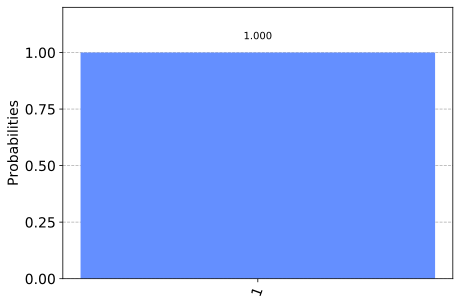

In [10]:
result = execute(qc,backend).result()
counts = result.get_counts()
plot_histogram(counts)

Iz ovoga možemo zaključiti da imamo 100% da izmjerimo |1>.

Idemo sada staviti naš qubit u superpoziciju i promotriti što se događa,

$$ |{q_0}\rangle = \frac{1}{\sqrt{2}}|{0}\rangle + \frac{i}{\sqrt{2}}|{1}\rangle $$.

Najprije moramo dodati amplitude ( $\alpha$ i $ \beta $ ) u Pythonovu listu. Da bi dodali kompleksne amplitude, koristimo _complex_ i kao argumente šaljemo realni i imaginarni dio.

In [11]:
initial_state = [1/sqrt(2), complex(0,1/sqrt(2))] # Definiramo stanje |q>

In [12]:
qc = QuantumCircuit(1) # Must redefine qc
qc.initialize(initial_state, 0) # Initialise the 0th qubit in the state `initial_state`
state = execute(qc,backend).result().get_statevector() # Execute the circuit
print(state)           # Print the result

[0.70710678+0.j         0.        +0.70710678j]


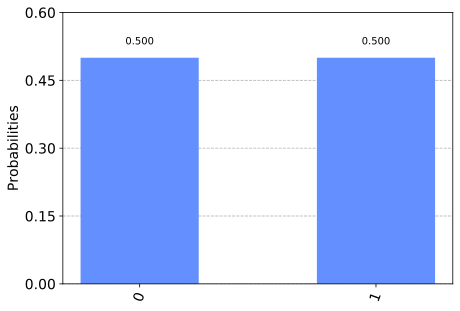

In [13]:
results = execute(qc,backend).result().get_counts()
plot_histogram(results)

Sada vidimo da imamo jednaku vjerojatnost da izmjerimo $|{0}\rangle$ ili $|{1}\rangle$

### Pravila mjerenja <a name="mjerenje"></a>

Postoji jednostavno pravilo mjerenja.
Da bi našli vjerojatnost mjerenja stanja $ |{\psi}\rangle $  u stanju  $|x\rangle$ 


$$ p( |x\rangle)=|⟨ψ|x⟩|^2 $$


Ako promotrimo gornje stanje $|{q_0}\rangle$ , vidimo da je vjerojatnost da izmjerimo  $|{0}\rangle$  upravo 0.5

$$ |{q_0}\rangle = \frac{1}{\sqrt{2}}|{0}\rangle + \frac{i}{\sqrt{2}}|{1}\rangle $$.

$$ \langle {q_0}| = \frac{1}{\sqrt{2}}\langle{0}| - \frac{i}{\sqrt{2}}\langle{1}| $$.

$$  \langle{q_0}|{0}\rangle =  \frac{1}{\sqrt{2}}\langle{0}|{0}\rangle -  \frac{i}{\sqrt{2}}\langle{1}|{0}\rangle $$

$$  \langle{q_0}|{0}\rangle =  \frac{1}{\sqrt{2}} * 1 -  \frac{i}{\sqrt{2}} * 0 $$

$$  \langle{q_0}|{0}\rangle = \frac{1}{\sqrt{2}} $$

$$  | \langle{q_0}|{0}\rangle |^2 = \frac{1}{2} $$

Ovo pravilo implicira nekoliko stvari:

#### 1. Normalizacija

Svojstveni vektor treba biti normaliziran. Ako želimo da je zbroj vjerojatnosti 1, želimo da je _magnituda(!!!!!!!)_ vektora 1: 

$$ \langle{\psi}|{\psi}\rangle=1 $$

Tj, ako je: $$ |{\psi}\rangle = \alpha|{0}\rangle +\beta |{1}\rangle $$

onda je 
$$ {\sqrt { | \alpha | ^2 + | \beta | ^2}} = 1  $$

Kada bi iz znatiželje pokušali koristiti _initialize()_ za vektor koji nije normalniziran, dobili bi grešku:

In [14]:
vector = [1,1]
qc.initialize(vector, 0)

QiskitError: 'Sum of amplitudes-squared does not equal one.'

#### 2. Globalna faza

Totalna ili globalna faza qubita nam ništa ne znače, jedino razlika u fazama između  $|{0}\rangle$ i $|{1}\rangle$ tzv. relativne faza.
Ovo je zbog toga što globalna faza nestaje kada mjerimo vjerojatnost. 
Npr, dva stanja

$$ |{a}\rangle =\frac{1}{\sqrt{2}} \begin{bmatrix} 1\\ i \end{bmatrix}  $$

$$ |{b}\rangle = \frac{1}{\sqrt{2}} \begin{bmatrix} i \\ -1 \end{bmatrix} $$

su nama jednaka jer jedan možemo pomnožiti $i$ da dobijemo drugi:

$$ i \times \frac{1}{\sqrt{2}} \begin{bmatrix} 1\\ i \end{bmatrix}  = \frac{1}{\sqrt{2}} \begin{bmatrix} i \\ -1 \end{bmatrix} $$

$$ i |{a}\rangle = |{b}\rangle $$

I onda izračunamo vjerojatnost mjerenja:

$$ | \langle{x}|{a}\rangle |^2 =  | \langle{x}| i |{a}\rangle |^2  | \langle{x}|{b}\rangle |^2  $$

#### 3. Efekt promatrača


Znamo da amplituda sadrži informaciju o tome s kojom ćemo vjerojatnosti pronaći qubit u specifičnom stanju, ali jednom kada izmjerimo qubit, sa sigurnošću znamo koje je njegovo stanje.
Npr, ako mjerimo qubit u stanju

$$ |{q}\rangle = \alpha|{0}\rangle +\beta |{1}\rangle $$. 

 i pronađemo ga u stanju $|0>$, mjerimo ponovno, 100% je vjerojatnost da ćemo ga naći u stanju $ \alpha|{0}\rangle$. 
 
 To znači da mjerenje mijenja stanje qubita.

$$ |{q}\rangle =\begin{bmatrix} \alpha \\ \beta \end{bmatrix} \xrightarrow {Measure   |{0}\rangle }{} |{q}\rangle = |{0}\rangle =\begin{bmatrix} 1 \\ 0 \end{bmatrix} $$



Zapravo, mjerenje ne samo da mijenja stanje qubita, već uništava njegovu superpoziciju i zamijeni ju jednom od dva konačna stanja.

Stoga naša mjerenja najčeće postavljamo na kraj sklopa.

Demonstrirajmo ovo koristeći već spomenut Qiskitov simulator.

In [15]:
qc = QuantumCircuit(1) # redefiniramo
initial_state = [0.+1.j/sqrt(2),1/sqrt(2)+0.j] #inicijaliziramo qubit u superpoziciji
qc.initialize(initial_state, [0])
qc.draw()

┌──────────────────────────────┐
q_0: ┤ Initialize(0.70711j,0.70711) ├
     └──────────────────────────────┘

In [16]:
state = execute(qc,backend).result().get_statevector()
print("Qubit State = " + str(state))

Qubit State = [0.        +0.70710678j 0.70710678+0.j        ]


In [17]:
qc.measure_all()
qc.draw()

┌──────────────────────────────┐ ░ ┌─┐
   q_0: ┤ Initialize(0.70711j,0.70711) ├─░─┤M├
        └──────────────────────────────┘ ░ └╥┘
meas_0: ════════════════════════════════════╩═

Simuliramo li cijeli sklop, vidimo da je jedna od amplituda uvijek 0:

In [18]:
state = execute(qc,backend).result().get_statevector()
print("State of Measured Qubit = " + str(state))

State of Measured Qubit = [0.+0.j 1.+0.j]


### Geometrijski prikaz qubita - Blochova kugla <a name="bloch"></a>

Kao što smo ranije vidjeli, generalno stanje qubita $|{q}\rangle$ je 
$$ |{q}\rangle = \alpha|{0}\rangle +\beta |{1}\rangle$$ ,            $$\alpha, \beta  \in  C $$

Prve dvije implikacije su nam rekle da ne možemo ponekad naći razliku između ova dva stanja, što znači da moramo biti malo specifičniji pri opisivanju qubita.

Kako ne možemo mjeriti globalnu fazu, možemo jedino mjeriti razliku u fazama između stanja $ |{0}\rangle$ i $|{1}\rangle $. 
Zapišimo stanje na drugačiji način: 
$$ |{q}\rangle = \alpha|{0}\rangle + e^{i \phi} \beta |{1}\rangle$$ ,    

$$\alpha, \beta, \phi \in  R $$

Qubit prvo mora biti normaliziran: $$ {\sqrt {  \alpha  ^2 +  \beta  ^2}} = 1  $$ 

i možemo iskoristiti trigonometrijske identitete da bi zapisali $\alpha$ i $\beta$: 

$$ |{q}\rangle = \cos \frac{\theta}{2}|{0}\rangle + e^{i \phi} \sin \frac{\theta}{2} |{1}\rangle $$ 

$$\theta, \phi \in  R $$

Ako interpretiramo $\theta, \phi$ kao sferne koordinate (r=1), možemo iscrtati bilo koje stanje qubita na kugli, poznatiji kao Blochova kugla.

Na slici dolje smo nacrtali qubit u stanju $ |{+}\rangle $. U ovom slučaju: $\theta = \frac{\pi}{2}$ i $\phi = 0$

(_Trenutno nije bitno kakvo je stanje_ $ |{+}\rangle $ )

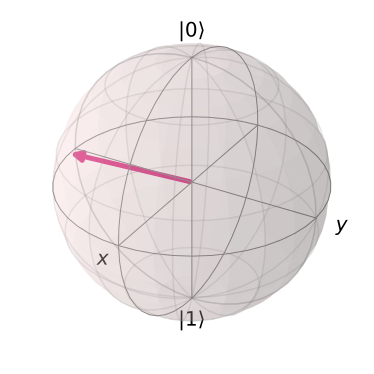

In [29]:
from qiskit.visualization import plot_bloch_vector
%matplotlib inline

plot_bloch_vector([pi/2,0,1])